In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('student-mat.csv', delimiter=';')

# Display the first few rows of the dataset
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [2]:
data.describe()

data.dtypes

data.isnull().sum()


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

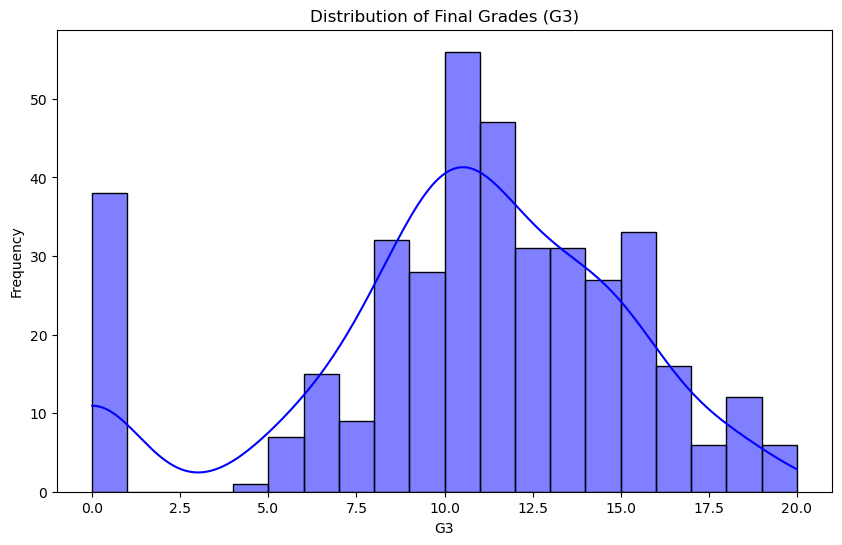

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['G3'], kde=True, bins=20, color='blue')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('G3')
plt.ylabel('Frequency')
plt.show()


C:\Users\anupu\AppData\Local\Temp\ipykernel_27216\2224891534.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


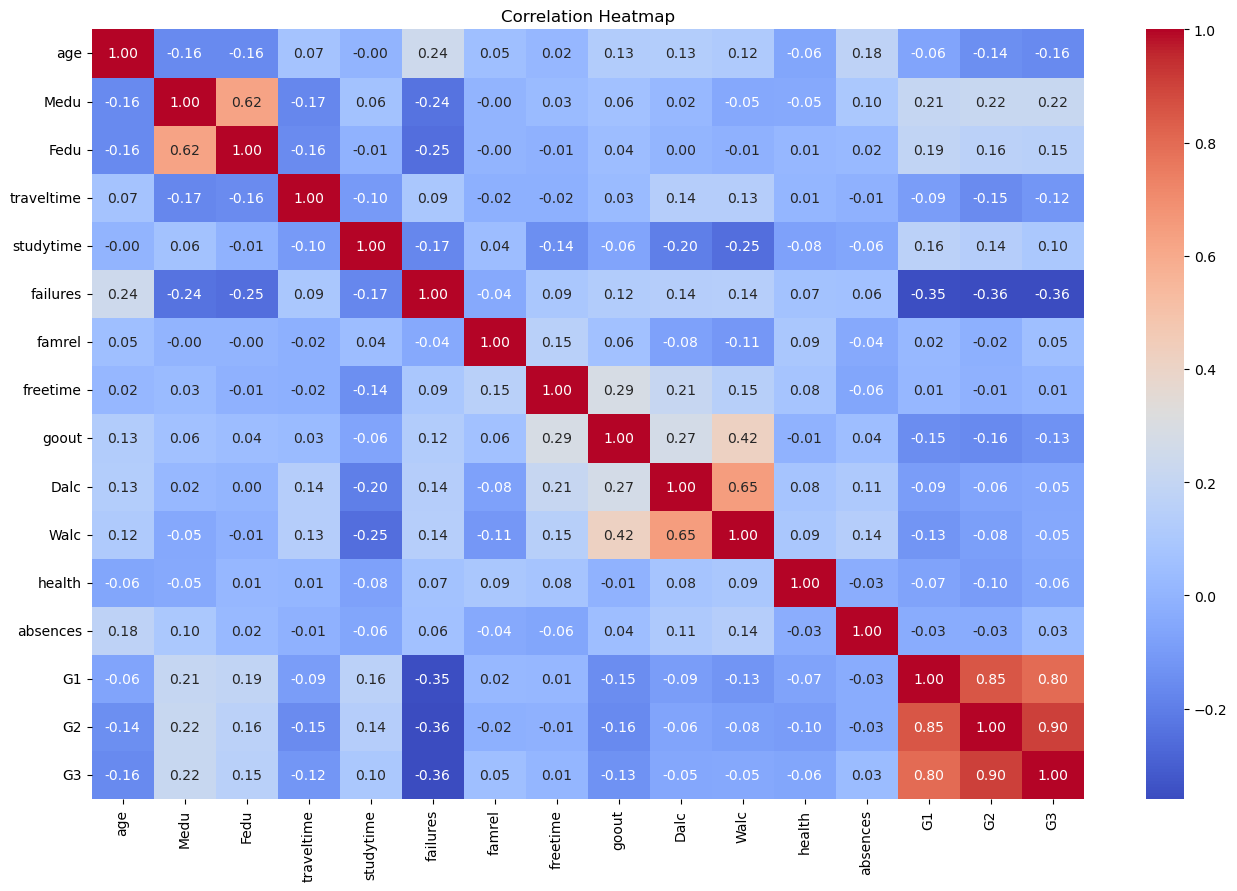

In [4]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


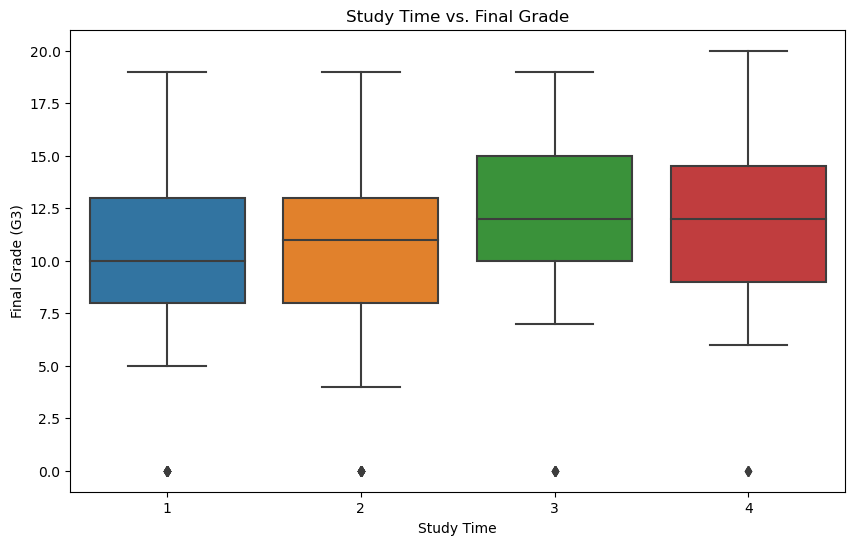

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='studytime', y='G3', data=data)
plt.title('Study Time vs. Final Grade')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()


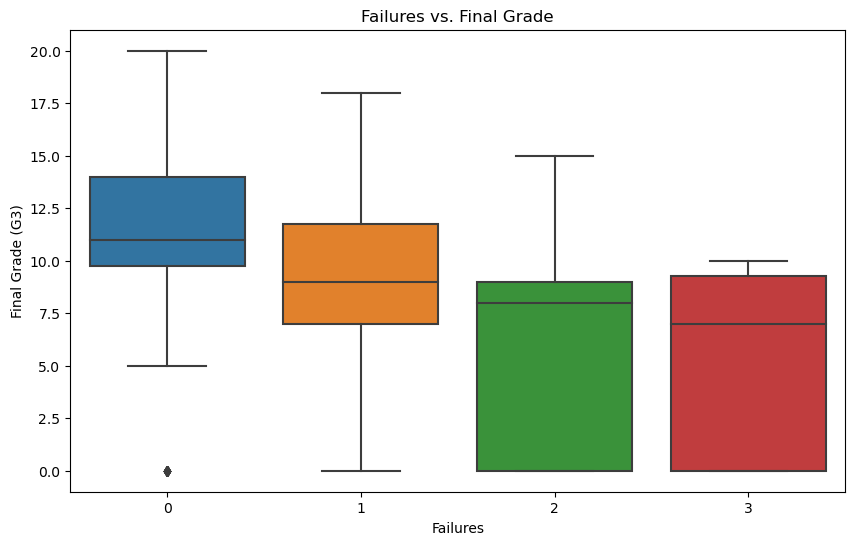

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='failures', y='G3', data=data)
plt.title('Failures vs. Final Grade')
plt.xlabel('Failures')
plt.ylabel('Final Grade (G3)')
plt.show()


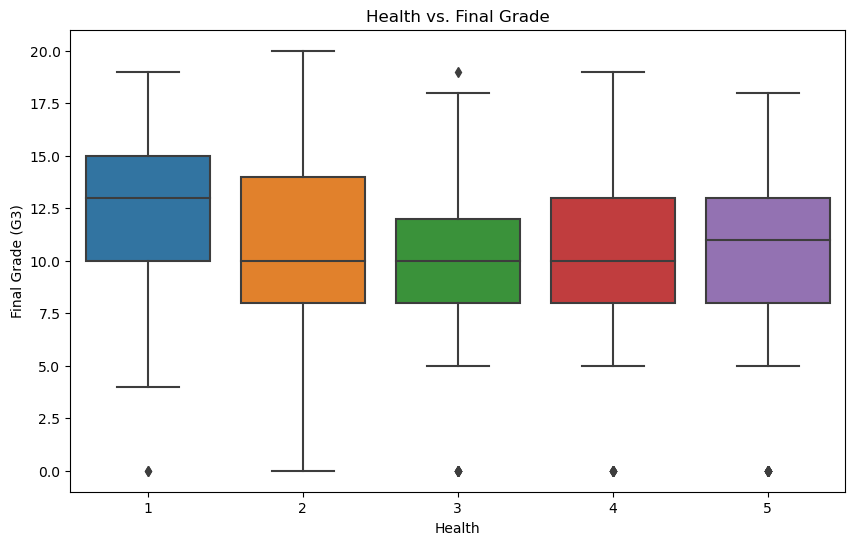

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='health', y='G3', data=data)
plt.title('Health vs. Final Grade')
plt.xlabel('Health')
plt.ylabel('Final Grade (G3)')
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target variable
X = data.drop(columns=['G3'])
y = data['G3']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression model
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', LinearRegression())])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression - MSE: {mse_lr}, R2: {r2_lr}')

# Random Forest Regressor model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestRegressor(random_state=42))])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Regressor - MSE: {mse_rf}, R2: {r2_rf}')


Linear Regression - MSE: 5.656642833231219, R2: 0.7241341236974024
Random Forest Regressor - MSE: 3.8347658227848105, R2: 0.8129842973462945


In [13]:
import numpy as np

# Example student data 
student_data = {
    'school': 'GP',
    'sex': 'F',
    'age': 17,
    'address': 'U',
    'famsize': 'GT3',
    'Pstatus': 'T',
    'Medu': 2,
    'Fedu': 1,
    'Mjob': 'at_home',
    'Fjob': 'other',
    'reason': 'course',
    'guardian': 'mother',
    'traveltime': 1,
    'studytime': 2,
    'failures': 0,
    'schoolsup': 'no',
    'famsup': 'yes',
    'paid': 'no',
    'activities': 'no',
    'nursery': 'yes',
    'higher': 'yes',
    'internet': 'yes',
    'romantic': 'no',
    'famrel': 4,
    'freetime': 3,
    'goout': 3,
    'Dalc': 1,
    'Walc': 2,
    'health': 5,
    'absences': 4,
    'G1': 10,
    'G2': 11
}

# Convert the student data to a DataFrame
student_df = pd.DataFrame([student_data])

# Predict the student's final grade using the Random Forest model
predicted_grade = rf_pipeline.predict(student_df)

print(f'Predicted Final Grade (G3): {predicted_grade[0]}')


Predicted Final Grade (G3): 10.83


In [14]:
from sklearn.metrics import classification_report

# Define a threshold to classify the scores
threshold = 10

# Convert the actual and predicted scores into binary classification (pass/fail)
y_test_class = (y_test >= threshold).astype(int)
y_pred_rf_class = (y_pred_rf >= threshold).astype(int)

# Print the classification report
print(classification_report(y_test_class, y_pred_rf_class))


              precision    recall  f1-score   support

           0       0.73      1.00      0.84        27
           1       1.00      0.81      0.89        52

    accuracy                           0.87        79
   macro avg       0.86      0.90      0.87        79
weighted avg       0.91      0.87      0.88        79

